In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df_owned = pd.read_csv("data/owned_games.csv")
df_recent = pd.read_csv("data/recent_games.csv")
df_achievements = pd.read_csv("data/achievements.csv")

# Check data
print(df_owned.head())
print(df_recent.head())
print(df_achievements.head())


   appid                       name  playtime_forever  \
0     10             Counter-Strike                 0   
1     20      Team Fortress Classic                 0   
2     30              Day of Defeat                 0   
3     40         Deathmatch Classic                 0   
4     50  Half-Life: Opposing Force                 0   

                               img_icon_url  playtime_windows_forever  \
0  6b0312cda02f5f777efa2f3318c307ff9acafbb5                         0   
1  38ea7ebe3c1abbbbf4eabdbef174c41a972102b9                         0   
2  aadc0ce51ff6ba2042d633f8ec033b0de62091d0                         0   
3  c525f76c8bc7353db4fd74b128c4ae2028426c2a                         0   
4  04e81206c10e12416908c72c5f22aad411b3aeef                         0   

   playtime_mac_forever  playtime_linux_forever  playtime_deck_forever  \
0                     0                       0                      0   
1                     0                       0                      0

/var/folders/k3/n72234bs16s26y2q_w59qb100000gn/T/ipykernel_15856/976143697.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_games["playtime_hours"], y=top_games["name"], palette="coolwarm")


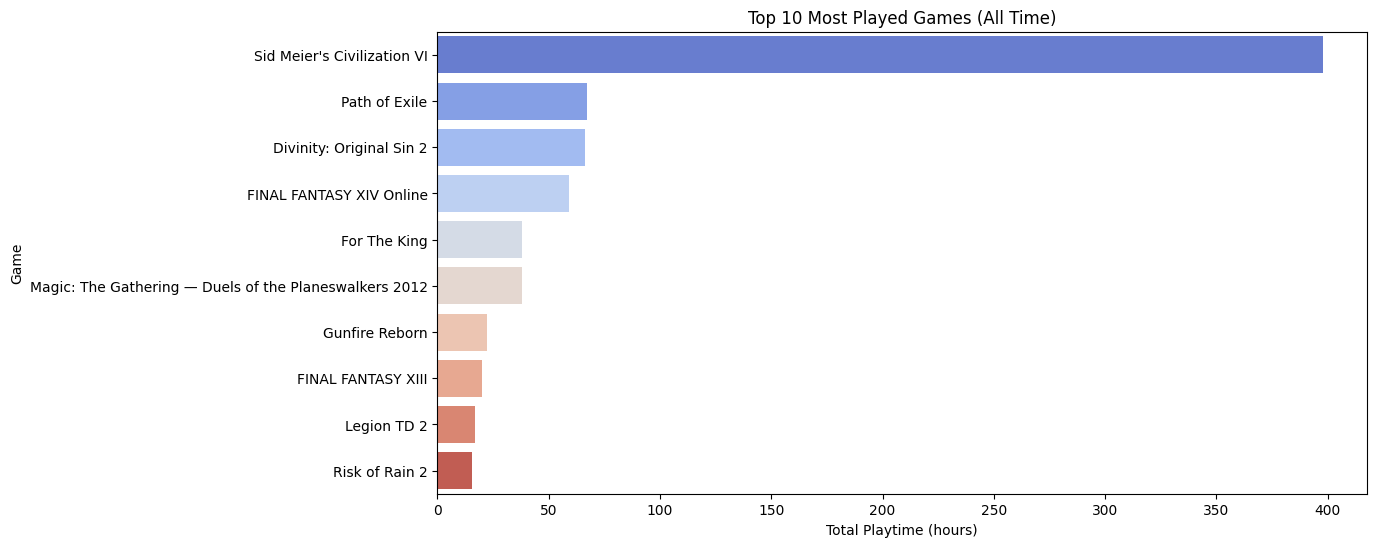

In [3]:

# Most Played Games (All Time)
plt.figure(figsize=(12,6))
top_games = df_owned.nlargest(10, "playtime_hours")
sns.barplot(x=top_games["playtime_hours"], y=top_games["name"], palette="coolwarm")
plt.xlabel("Total Playtime (hours)")
plt.ylabel("Game")
plt.title("Top 10 Most Played Games (All Time)")
plt.show()


/var/folders/k3/n72234bs16s26y2q_w59qb100000gn/T/ipykernel_15856/4065395158.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_recent["playtime_hours"], y=df_recent["name"], palette="Blues_r")


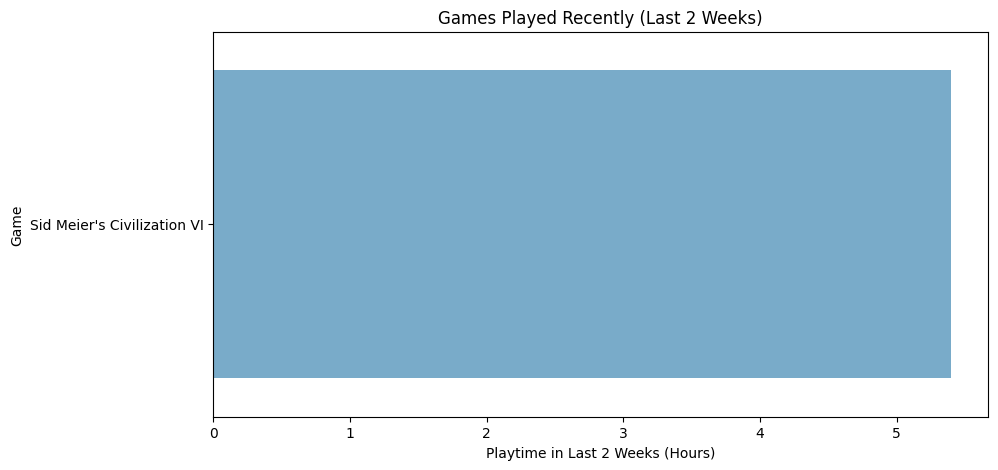

In [4]:

# Recently Played Games (Last 2 Weeks)
df_recent["name"] = df_recent["appid"].map(df_owned.set_index("appid")["name"])
plt.figure(figsize=(10,5))
sns.barplot(x=df_recent["playtime_hours"], y=df_recent["name"], palette="Blues_r")
plt.xlabel("Playtime in Last 2 Weeks (Hours)")
plt.ylabel("Game")
plt.title("Games Played Recently (Last 2 Weeks)")
plt.show()


/var/folders/k3/n72234bs16s26y2q_w59qb100000gn/T/ipykernel_15856/1942298380.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_achievement_games["completed"], y=top_achievement_games["game_name"], palette="viridis")


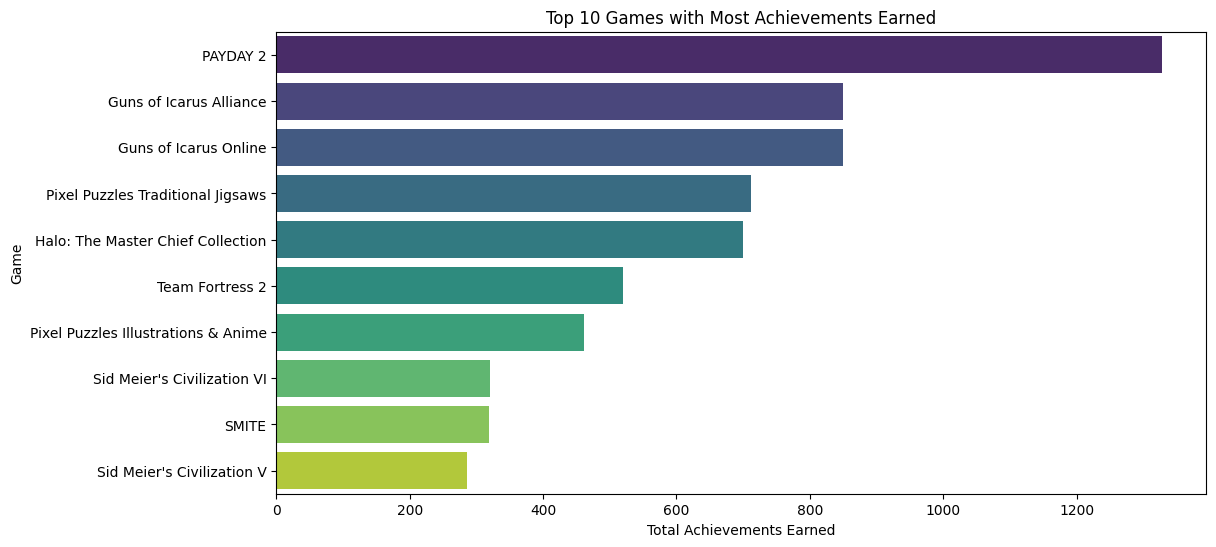

In [7]:

# Achievement Completion Rate (Top 10 Games with Most Achievements)
df_achievements["completed"] = df_achievements["achieved"] == 1
achievement_count = df_achievements.groupby("game_name")["completed"].count().reset_index()
top_achievement_games = achievement_count.nlargest(10, "completed")

plt.figure(figsize=(12,6))
sns.barplot(x=top_achievement_games["completed"], y=top_achievement_games["game_name"], palette="viridis")
plt.xlabel("Total Achievements Earned")
plt.ylabel("Game")
plt.title("Top 10 Games with Most Achievements Earned")
plt.show()

/var/folders/k3/n72234bs16s26y2q_w59qb100000gn/T/ipykernel_15856/3110012073.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=achievement_rate["completed"] * 100, y=achievement_rate["game_name"], palette="viridis")


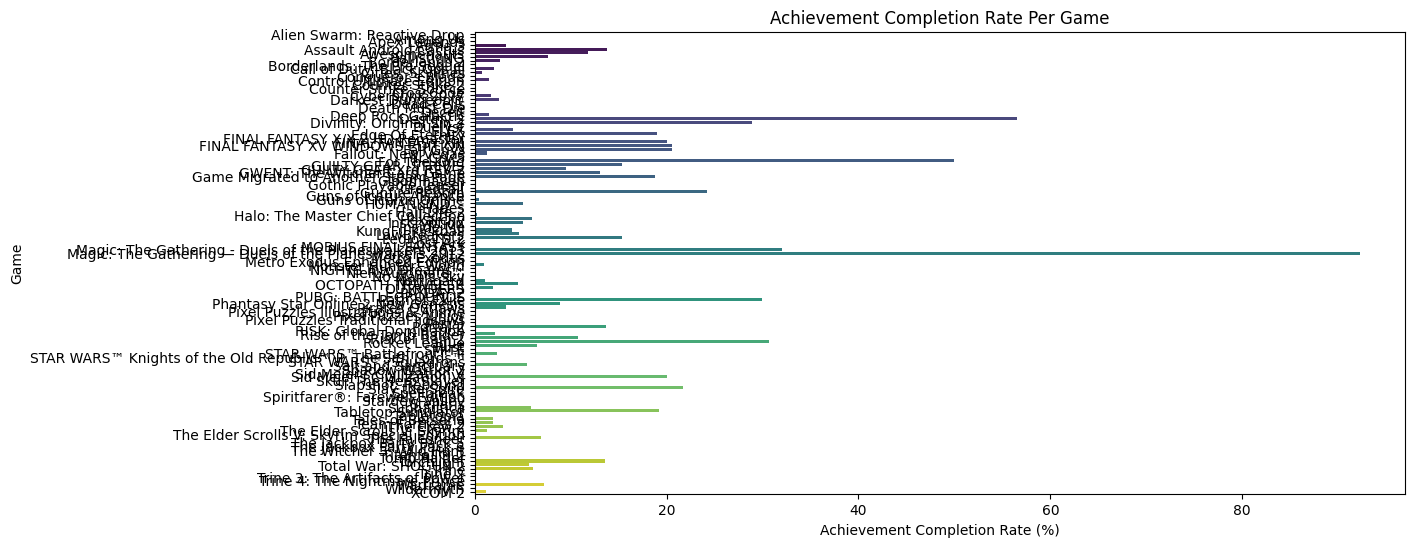